In [ ]:
html_text=requests.get('https://boehm-dance.com/index.php/events').text
soup=BeautifulSoup(html_text,'lxml')

In [ ]:
soup

<!DOCTYPE html>
<html dir="ltr" lang="de-de">
<head>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="/images/favicon/Favicon-BDE-100px.png" rel="icon" sizes="any"/>
<link href="/images/favicon/Favicon-BDE-1080.svg" rel="icon" type="image/svg+xml"/>
<link href="/images/favicon/Favicon-BDE-160px.png" rel="apple-touch-icon"/>
<meta charset="utf-8"/>
<meta content="Thorsten Böhm" name="author"/>
<meta content="Hier tanzt Pforzheim. Einfach und entspannt tanzen lernen für Paare, Singles, Jugendliche und Kinder → Deine Tanzschule Böhm in Pforzheim." name="description"/>
<meta content="Joomla! - Open Source Content Management" name="generator"/>
<title>Events</title>
<link as="style" href="/media/system/css/joomla-fontawesome.min.css?ver=4.3.13" onload="this.onload=null;this.rel='stylesheet'" rel="preload"/>
<link href="/media/vendor/joomla-custom-elements/css/joomla-alert.min.css?0.2.0" rel="stylesheet"/>
<link href="/media/com_kickconsentmanager/css/kcmwall

In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the events page
url = 'https://boehm-dance.com/index.php/events'

# Send a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize a dictionary to store event details
event_data = {
    'Event Name': None,
    'Date': None,
    'Time': None,
    'Ticket Price': None,
    'Entrance Time': None,
    'Workshop': None,
    'Tanzbar XXL': None,
    'Flying Drinks': None,
    'Ticket Link': None
}

# Extract event name
event_name = soup.find('h3', class_='el-title uk-h2 uk-margin-top uk-margin-remove-bottom')
if event_name:
    event_data['Event Name'] = event_name.get_text(strip=True)

# Extract event date
event_date = soup.find('div', class_='fs-grid-cell-text uk-margin-remove-first-child')
if event_date:
    date_text = event_date.find('div', class_='fs-grid-meta fs-grid-meta-1')
    if date_text:
        event_data['Date'] = date_text.get_text(strip=True)

# Extract event time
event_time = soup.find_all('div', class_='fs-grid-cell-text uk-margin-remove-first-child')
if len(event_time) > 1:
    time_text = event_time[1].find('div', class_='fs-grid-meta fs-grid-meta-2')
    if time_text:
        event_data['Time'] = time_text.get_text(strip=True)

# Extract ticket price
ticket_price_elements = soup.find_all('div', class_='fs-grid-fieldset fs-grid-fieldset-3 fs-mw uk-grid-margin uk-first-column')
if ticket_price_elements:
    ticket_price_text = ticket_price_elements[0].find('div', class_='fs-grid-meta fs-grid-meta-3')
    if ticket_price_text:
        event_data['Ticket Price'] = ticket_price_text.get_text(strip=True)

# Extract entrance time
entrance_time_elements = soup.find_all('div', class_='fs-grid-fieldset fs-grid-fieldset-4 fs-mw uk-grid-margin')
if entrance_time_elements:
    entrance_time_text = entrance_time_elements[0].find('div', class_='fs-grid-meta fs-grid-meta-4')
    if entrance_time_text:
        event_data['Entrance Time'] = entrance_time_text.get_text(strip=True)

# Extract workshop details
workshop = soup.find('div', class_='el-content uk-panel')
if workshop:
    workshop_text = workshop.get_text(strip=True)
    parts = workshop_text.split('TANZBAR XXL')
    if len(parts) > 1:
        event_data['Workshop'] = parts[0].strip()
        tanzbar_xxl_flying_drinks = parts[1].split('FLYING DRINKS')
        if len(tanzbar_xxl_flying_drinks) > 1:
            event_data['Tanzbar XXL'] = tanzbar_xxl_flying_drinks[0].strip()
            event_data['Flying Drinks'] = tanzbar_xxl_flying_drinks[1].split('TIP:')[0].strip()

# Extract ticket link
ticket_link = soup.find('a', class_='el-content uk-button uk-button-primary uk-button-small uk-flex-inline uk-flex-center uk-flex-middle')
if ticket_link:
    event_data['Ticket Link'] = ticket_link.get('href')

# Create a DataFrame
df = pd.DataFrame([event_data])

# Print the DataFrame
print(df)


              Event Name           Date               Time Ticket Price  \
0  DANCE NIGHT ALL WHITE  21. September  19:30 - 24:00 Uhr         None   

  Entrance Time                                           Workshop  \
0          None  DEIN ALL INCLUSIVE PAKETWORKSHOP | 19:30 UHR:D...   

                                         Tanzbar XXL  \
0  | 20:30 UHR:Auf 2 Floors & Ebenen werden Euch ...   

                                       Flying Drinks  \
0  FREE:An der Bar vorbeifliegen - Drinks abholen...   

                            Ticket Link  
0  /index.php/events/ticket-dance-night  


In [43]:
df1.head()

,Event Name,Date,Time,Ticket Price,Entrance Time,Workshop,Tanzbar XXL,Flying Drinks,Ticket Link
0,DANCE NIGHT ALL WHITE,21. September,19:30 - 24:00 Uhr,None,None,DEIN ALL INCLUSIVE PAKETWORKSHOP | 19:30 UHR:D...,| 20:30 UHR:Auf 2 Floors & Ebenen werden Euch ...,FREE:An der Bar vorbeifliegen - Drinks abholen...,/index.php/events/ticket-dance-night


In [5]:
!pip install googletrans

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=fee059186e069071d44de8c802123137cadd1d3b50219a7c98aea1939bb68d1a
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
   

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from deep_translator import GoogleTranslator

# Initialize the translator
translator = GoogleTranslator(source='de', target='en')

# URL of the events page
url = 'https://boehm-dance.com/index.php/events'

# Send a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize a list to store all event details
event_list = []

# Find all event containers
event_containers = soup.find_all('div', class_='fs-grid-item-2-container')

for event in event_containers:
    event_data = {
        'Event Name': None,
        'Date': None,
        'Time': None,
        'Ticket Price': None,
        'Entrance Time': None,
        'Description': None
    }

    # Extract event name
    title = event.find('h3', class_='el-title')
    if title:
        event_data['Event Name'] = translator.translate(title.get_text(strip=True))

    # Extract event date
    date = event.find('div', class_='fs-grid-meta fs-grid-meta-1')
    if date:
        event_data['Date'] = translator.translate(date.get_text(strip=True))

    # Extract event time
    time = event.find('div', class_='fs-grid-meta fs-grid-meta-2')
    if time:
        event_data['Time'] = translator.translate(time.get_text(strip=True))

    # Extract ticket price
    ticket_price = event.find('div', class_='fs-grid-meta fs-grid-meta-3')
    if ticket_price:
        event_data['Ticket Price'] = translator.translate(ticket_price.get_text(strip=True))

    # Extract entrance time
    entrance_time = event.find('div', class_='fs-grid-meta fs-grid-meta-4')
    if entrance_time:
        event_data['Entrance Time'] = translator.translate(entrance_time.get_text(strip=True))

    # Extract description
    description = event.find('div', class_='el-content')
    if description:
        event_data['Description'] = translator.translate(description.get_text(strip=True))

    # Append event data to the list
    event_list.append(event_data)

# Convert the list to a DataFrame
df2 = pd.DataFrame(event_list)

# Print the DataFrame
print(df2)


                    Event Name          Date                   Time  \
0  Children's party world tour  14 September  5:00 p.m. - 6:30 p.m.   

  Ticket Price        Entrance Time  \
0         Free  Admission 4:30 p.m.   

                                         Description  
0  We invite you to a very special trip around th...  


In [10]:
df2.head()

,Event Name,Date,Time,Ticket Price,Entrance Time,Description
0,Children's party world tour,14 September,5:00 p.m. - 6:30 p.m.,Free,Admission 4:30 p.m.,We invite you to a very special trip around th...


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from deep_translator import GoogleTranslator

# Initialize the translator
translator = GoogleTranslator(source='de', target='en')

# URL of the events page
url = 'https://boehm-dance.com/index.php/events?lang=en'

# Send a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize a list to store all event details
event_list = []

# Find all event containers
event_containers = soup.find_all('div', class_='fs-grid-item-3-container')

for event in event_containers:
    event_data = {
        'Event Name': None,
        'Date': None,
        'Time': None,
        'Ticket Price': None,
        'Entrance Time': None,
        'Description': None
    }

    # Extract event name
    title = event.find('h3', class_='el-title')
    if title:
        event_data['Event Name'] = title.get_text(strip=True)

    # Extract event date
    date = event.find('div', class_='fs-grid-meta fs-grid-meta-1')
    if date:
        event_data['Date'] = date.get_text(strip=True)

    # Extract event time
    time = event.find('div', class_='fs-grid-meta fs-grid-meta-2')
    if time:
        event_data['Time'] = time.get_text(strip=True)

    # Extract ticket price
    ticket_price = event.find('div', class_='fs-grid-meta fs-grid-meta-3')
    if ticket_price:
        event_data['Ticket Price'] = ticket_price.get_text(strip=True)

    # Extract entrance time
    entrance_time = event.find('div', class_='fs-grid-meta fs-grid-meta-4')
    if entrance_time:
        event_data['Entrance Time'] = entrance_time.get_text(strip=True)

    # Extract description
    description = event.find('div', class_='el-content')
    if description:
        description_text = description.get_text(strip=True)
        # Translate description to English
        translated_description = translator.translate(description_text)
        event_data['Description'] = translated_description

    # Append event data to the list
    event_list.append(event_data)

# Convert the list to a DataFrame
df3 = pd.DataFrame(event_list)

# Print the DataFrame
print(df3)


          Event Name           Date               Time   Ticket Price  \
0  Long Friday Night  06. September  22:00 - 01:00 Uhr  Abendkasse 5€   

       Entrance Time                                        Description  
0  Einlass 21:30 Uhr  After your summer vacation, hit the dance floo...  


In [13]:
df3.head()

,Event Name,Date,Time,Ticket Price,Entrance Time,Description
0,Long Friday Night,06. September,22:00 - 01:00 Uhr,Abendkasse 5€,Einlass 21:30 Uhr,"After your summer vacation, hit the dance floo..."


In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from deep_translator import GoogleTranslator

# URL of the events page
url = 'https://boehm-dance.com/index.php/events?lang=en'

# Send a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize a list to store all event details
event_list = []

# Create a Translator object
translator = GoogleTranslator(source='de', target='en')

# Define a function to extract event details
def extract_event_details(event, event_name):
    event_data = {
        'Event Name': event_name,
        'Date': None,
        'Time': None,
        'Ticket Price': None,
        'Entrance Time': None,
        'Description': None,
        'Ticket Link': None,
        'Event Image': None
    }

    # Extract event details based on known event name
    if event_name == 'Zumba Party 2024':
        # Extract description
        description = event.find('div', class_='el-content')
        if description:
            description_text = description.get_text(strip=True)
            translated_description = translator.translate(description_text)
            event_data['Description'] = translated_description

        # Extract ticket link
        ticket_link = event.find('a', class_='uk-button uk-button-primary uk-button-small')
        if ticket_link and 'href' in ticket_link.attrs:
            event_data['Ticket Link'] = ticket_link['href']

    elif event_name == 'Summer Festival 2024':
        # Extract date
        date = event.find('div', class_='fs-grid-meta fs-grid-meta-1')
        if date:
            date_text = date.get_text(strip=True)
            translated_date = translator.translate(date_text)
            event_data['Date'] = translated_date

        # Extract time
        time = event.find('div', class_='fs-grid-meta fs-grid-meta-2')
        if time:
            time_text = time.get_text(strip=True)
            translated_time = translator.translate(time_text)
            event_data['Time'] = translated_time

        # Extract event image
        image_tag = event.find('img')
        if image_tag and 'src' in image_tag.attrs:
            event_data['Event Image'] = image_tag['src']

    return event_data

# Find Zumba Party container
zumba_event = soup.find('div', class_='el-item fs-grid-item-2 uk-card uk-card-default')
if zumba_event:
    event_list.append(extract_event_details(zumba_event, 'Zumba Party 2024'))

# Find Summer Festival container
summer_festival_event = soup.find('div', class_='fs-grid-item-5-container')
if summer_festival_event:
    event_list.append(extract_event_details(summer_festival_event, 'Summer Festival 2024'))

# Convert the list to a DataFrame
df4 = pd.DataFrame(event_list)

# Print the DataFrame
print(df4)


             Event Name     Date           Time Ticket Price Entrance Time  \
0  Summer Festival 2024  22 June  18:00 - 22:30         None          None   

  Description Ticket Link                                        Event Image  
0        None        None  /templates/yootheme/cache/59/Summer-Festival-I...  


In [19]:
df4.head()

,Event Name,Date,Time,Ticket Price,Entrance Time,Description,Ticket Link,Event Image
0,Summer Festival 2024,22 June,18:00 - 22:30,None,None,None,None,/templates/yootheme/cache/59/Summer-Festival-I...


In [20]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML snippet
soup = BeautifulSoup(html_snippet, 'html.parser')

# Initialize a list to store the Zumba Party details
event_list = []

# Extract description
description = soup.find('div', class_='el-content uk-panel uk-margin-top')
description_text = description.get_text(strip=True) if description else None

# Extract ticket link
ticket_link = soup.find('a', class_='el-content uk-button uk-button-primary uk-button-small uk-flex-inline uk-flex-center uk-flex-middle')
ticket_url = ticket_link['href'] if ticket_link and 'href' in ticket_link.attrs else None

# Collect event details
event_data = {
    'Event Name': 'Zumba Party 2024',
    'Description': description_text,
    'Ticket Link': ticket_url
}

# Append event data to the list
event_list.append(event_data)

# Convert the list to a DataFrame
df5 = pd.DataFrame(event_list)

# Print the DataFrame
print(df5)


         Event Name                                        Description  \
0  Zumba Party 2024  Are you ready? Our Zumba party is exactly what...   

                                         Ticket Link  
0  https://boehm-dance.com/index.php/events/ticke...  


In [21]:
df5.head()

,Event Name,Description,Ticket Link
0,Zumba Party 2024,Are you ready? Our Zumba party is exactly what...,https://boehm-dance.com/index.php/events/ticke...


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from deep_translator import GoogleTranslator

# URL of the events page
url = 'https://boehm-dance.com/index.php/events'

# Send a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize a list to store all event details
event_list = []

# Create a Translator object
translator = GoogleTranslator(source='de', target='en')

# Find all event containers
event_containers = soup.find_all('div', class_='fs-grid-item-2-container')

# Extract details for "Summer Festival"
summer_festival = soup.find('div', id='summerfestival2024')
if summer_festival:
    event_data = {
        'Event Name': None,
        'Date': None,
        'Time': None,
        'Ticket Price': None,
        'Entrance Time': None,
        'Description': None
    }

    # Extract event name
    title = summer_festival.find('h3', class_='el-title')
    if title:
        event_data['Event Name'] = translator.translate(title.get_text(strip=True))

    # Extract event date
    date = summer_festival.find('div', class_='fs-grid-meta fs-grid-meta-1')
    if date:
        event_data['Date'] = translator.translate(date.get_text(strip=True))

    # Extract event time
    time = summer_festival.find('div', class_='fs-grid-meta fs-grid-meta-2')
    if time:
        event_data['Time'] = translator.translate(time.get_text(strip=True))

    # Extract description
    description = summer_festival.find('div', class_='el-content')
    if description:
        event_data['Description'] = translator.translate(description.get_text(strip=True))

    # Since no ticket price and entrance time provided in the snippet, these fields remain None
    event_list.append(event_data)

# Convert the list to a DataFrame
df6 = pd.DataFrame(event_list)

# Print the DataFrame
print(df6)


        Event Name     Date           Time Ticket Price Entrance Time  \
0  Summer Festival  22 June  18:00 - 22:30         None          None   

                                         Description  
0  Look forward to an unforgettable summer experi...  


In [24]:
df6.head()

,Event Name,Date,Time,Ticket Price,Entrance Time,Description
0,Summer Festival,22 June,18:00 - 22:30,None,None,Look forward to an unforgettable summer experi...


In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from deep_translator import GoogleTranslator

# URL of the events page
url = 'https://boehm-dance.com/index.php/events'

# Send a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize a list to store event details
event_list = []

# Create a Translator object
translator = GoogleTranslator(source='de', target='en')

# Find the event container for "Motorcycle Tour 2024"
event_container = soup.find('div', id='motorradtour2024')

if event_container:
    event_data = {
        'Event Name': None,
        'Date': None,
        'Time': None,
        'Ticket Price': None,
        'Entrance Time': None,
        'Description': None
    }

    # Extract event name
    title = event_container.find('h3', class_='el-title')
    if title:
        event_data['Event Name'] = translator.translate(title.get_text(strip=True))

    # Extract event date
    date = event_container.find('div', class_='fs-grid-meta fs-grid-meta-1')
    if date:
        event_data['Date'] = translator.translate(date.get_text(strip=True))

    # Extract event time
    time = event_container.find('div', class_='fs-grid-meta fs-grid-meta-2')
    if time:
        event_data['Time'] = translator.translate(time.get_text(strip=True))

    # Extract ticket price
    ticket_price = event_container.find('div', class_='fs-grid-meta fs-grid-meta-3')
    if ticket_price:
        event_data['Ticket Price'] = translator.translate(ticket_price.get_text(strip=True))

    # Extract entrance time (not explicitly available in provided HTML)
    entrance_time = None  # Replace with actual entrance time extraction logic if available
    if entrance_time:
        event_data['Entrance Time'] = translator.translate(entrance_time.get_text(strip=True))

    # Extract description
    description = event_container.find('div', class_='el-content')
    if description:
        event_data['Description'] = translator.translate(description.get_text(strip=True))

    # Append event data to the list
    event_list.append(event_data)

# Convert the list to a DataFrame
df7 = pd.DataFrame(event_list)
print(df7)


             Event Name     Date                    Time    Ticket Price  \
0  Motorcycle tour 2024  08 June  10:00 a.m. - 5:00 p.m.  5€ coffee fund   

  Entrance Time                                        Description  
0          None  We cordially invite you to an exciting day tou...  


In [27]:
df7.head()

,Event Name,Date,Time,Ticket Price,Entrance Time,Description
0,Motorcycle tour 2024,08 June,10:00 a.m. - 5:00 p.m.,5€ coffee fund,None,We cordially invite you to an exciting day tou...


In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from deep_translator import GoogleTranslator

# URL of the event page
url = 'https://boehm-dance.com/index.php/events'

# Send a request to fetch the HTML content
response = requests.get(url)
html_content = response.text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Initialize the translator
translator = GoogleTranslator(source='de', target='en')

# Find the specific event section (for "Dance into May")
event_section = soup.find('div', id='tanzindenmai')

if event_section:
    # Extract event details in German
    event_details_german = {
        'Event Name': event_section.find('h3', class_='el-title uk-h2 uk-margin-top uk-margin-remove-bottom').get_text(strip=True) if event_section.find('h3', class_='el-title uk-h2 uk-margin-top uk-margin-remove-bottom') else 'N/A',
        'Date': event_section.find('div', class_='fs-grid-meta fs-grid-meta-1').get_text(strip=True) if event_section.find('div', class_='fs-grid-meta fs-grid-meta-1') else 'N/A',
        'Time': event_section.find('div', class_='fs-grid-meta fs-grid-meta-2').get_text(strip=True) if event_section.find('div', class_='fs-grid-meta fs-grid-meta-2') else 'N/A',
        'Ticket Status': event_section.find('div', class_='fs-grid-meta fs-grid-meta-3').get_text(strip=True) if event_section.find('div', class_='fs-grid-meta fs-grid-meta-3') else 'N/A',
        'Entrance Time': event_section.find('div', class_='fs-grid-meta fs-grid-meta-4').get_text(strip=True) if event_section.find('div', class_='fs-grid-meta fs-grid-meta-4') else 'N/A',
        'Description': event_section.find('div', class_='el-content uk-panel uk-margin-top').get_text(strip=True) if event_section.find('div', class_='el-content uk-panel uk-margin-top') else 'N/A'
    }

    # Print the German details for debugging
    print("German Event Details:")
    for key, value in event_details_german.items():
        print(f"{key}: {value}")

    # Translate event details to English
    event_details_english = {key: translator.translate(value) for key, value in event_details_german.items()}

    # Convert the event details into a DataFrame
    df8= pd.DataFrame([event_details_english])

    # Print the DataFrame
    print("\nTranslated Event Details:")
    print(df8.head())
else:
    print("Event section not found.")


German Event Details:
Event Name: Tanz in den Mai
Date: 30. April
Time: 20:00 - 01:00 Uhr
Ticket Status: AUSERKAUFT!
Entrance Time: Einlass 19:30 Uhr
Description: Es ist soweit! Der Frühling erwacht und wir feiern mit Euch den "Tanz in den Mai" Jubiläums Edition. Erlebt einen lustigen und gemütlichen Abend mit fetziger Tanzmusik, tollen Shows und bester Stimmung. Es erwarten Euch leckere Drinks und die legendäre Lüneburger Erdbeerbowle nach Uroma Hilde's Originalrezept. Für den kleinen Hunger verwöhnt Euch Giuseppe's Foodtruck mit italienischer Pinsa frisch aus dem Steinofen. Wir freuen uns auf Euch. [Essen/Snacks siehe: "Mehr Infos"]

Translated Event Details:
       Event Name      Date           Time Ticket Status       Entrance Time  \
0  Dance into May  30.April  20:00 - 01:00     SOLD OUT!  Entrance 7:30 p.m.   

                                         Description  
0  The time has come! Spring is awakening and we ...  


In [29]:
df8.head()

,Event Name,Date,Time,Ticket Status,Entrance Time,Description
0,Dance into May,30.April,20:00 - 01:00,SOLD OUT!,Entrance 7:30 p.m.,The time has come! Spring is awakening and we ...


In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from deep_translator import GoogleTranslator

# URL of the event page
url = 'https://boehm-dance.com/index.php/events'

# Send a request to fetch the HTML content
response = requests.get(url)
html_content = response.text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Initialize the translator
translator = GoogleTranslator(source='de', target='en')

# Find the specific event section (for "Salsa Night")
event_section = soup.find('div', id='salsanight')

if event_section:
    # Extract event details in German
    event_details_german = {
        'Event Name': event_section.find('h3', class_='el-title uk-h2 uk-margin-top uk-margin-remove-bottom').get_text(strip=True) if event_section.find('h3', class_='el-title uk-h2 uk-margin-top uk-margin-remove-bottom') else 'N/A',
        'Date': event_section.find('div', class_='fs-grid-meta fs-grid-meta-1').get_text(strip=True) if event_section.find('div', class_='fs-grid-meta fs-grid-meta-1') else 'N/A',
        'Time': event_section.find('div', class_='fs-grid-meta fs-grid-meta-2').get_text(strip=True) if event_section.find('div', class_='fs-grid-meta fs-grid-meta-2') else 'N/A',
        'Ticket Status': event_section.find('div', class_='fs-grid-meta fs-grid-meta-3').get_text(strip=True) if event_section.find('div', class_='fs-grid-meta fs-grid-meta-3') else 'N/A',
        'Entrance Time': event_section.find('div', class_='fs-grid-meta fs-grid-meta-4').get_text(strip=True) if event_section.find('div', class_='fs-grid-meta fs-grid-meta-4') else 'N/A',
        'Description': event_section.find('div', class_='el-content uk-panel uk-margin-top').get_text(strip=True) if event_section.find('div', class_='el-content uk-panel uk-margin-top') else 'N/A'
    }

    # Print the German details for debugging
    print("German Event Details:")
    for key, value in event_details_german.items():
        print(f"{key}: {value}")

    # Translate event details to English
    event_details_english = {key: translator.translate(value) for key, value in event_details_german.items()}

    # Convert the event details into a DataFrame
    df9 = pd.DataFrame([event_details_english])

    # Print the DataFrame
    print("\nTranslated Event Details:")
    print(df9.head())
else:
    print("Event section not found.")


German Event Details:
Event Name: Salsa Night
Date: 05. April
Time: 22:00 - 01:00 Uhr
Ticket Status: Abendkasse 5€
Entrance Time: Einlass 21:30 Uhr
Description: Die Salsa Night im April bekommt Zuwachs. Als „Long Friday Night“ (22:00 – 01:00 Uhr) steht allen Besuchern nun zusätzlich ein Discofox-Floor zur Verfügung. Mehr Tanz, mehr Abwechslung. Der Salsa Schnupperkurs startet um 21:30 Uhr und geht nahtlos in den Salsa-Floor über. Hier ist für Jede(n) was dabei. Wir freuen uns auf Euch. Abendkasse: 5€

Translated Event Details:
    Event Name      Date           Time  Ticket Status       Entrance Time  \
0  Salsa Night  05.April  22:00 - 01:00  Box office 5€  Entrance 9:30 p.m.   

                                         Description  
0  The Salsa Night in April is getting an additio...  


In [31]:
df9.head()


,Event Name,Date,Time,Ticket Status,Entrance Time,Description
0,Salsa Night,05.April,22:00 - 01:00,Box office 5€,Entrance 9:30 p.m.,The Salsa Night in April is getting an additio...


In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the event page
url = 'https://boehm-dance.com/index.php/events'

# Fetch the HTML content of the page
response = requests.get(url)
html_content = response.text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Initialize a dictionary to store the event details
event_data = {
    'Date': None,
    'Time': None,
    'Ticket Price': None,
    'Admission Time': None,
    'Description': None,
    'Ticket Link': None
}

# Find the section for the "Discofox Dance Bar" event
event_section = soup.find('div', class_='fs-grid-nested-1-container uk-panel')

if event_section:
    # Extract the date
    date = event_section.find('div', class_='fs-grid-fieldset fs-grid-fieldset-1 fs-mw')
    event_data['Date'] = date.get_text(strip=True).split('\n')[-1] if date else 'N/A'

    # Extract the time
    time = event_section.find('div', class_='fs-grid-fieldset fs-grid-fieldset-2 fs-mw')
    event_data['Time'] = time.get_text(strip=True).split('\n')[-1] if time else 'N/A'

    # Extract the ticket price
    ticket_price = event_section.find('div', class_='fs-grid-fieldset fs-grid-fieldset-3 fs-mw')
    event_data['Ticket Price'] = ticket_price.get_text(strip=True).split('\n')[-1] if ticket_price else 'N/A'

    # Extract the admission time
    admission_time = event_section.find('div', class_='fs-grid-fieldset fs-grid-fieldset-4 fs-mw')
    event_data['Admission Time'] = admission_time.get_text(strip=True).split('\n')[-1] if admission_time else 'N/A'

    # Extract the event description
    description_section = event_section.find('div', class_='el-content uk-panel uk-margin-top')
    event_data['Description'] = description_section.get_text(strip=True) if description_section else 'N/A'

    # Extract the ticket link
    ticket_link_tag = event_section.find('a', class_='el-content uk-button uk-button-primary uk-button-small uk-flex-inline uk-flex-center uk-flex-middle')
    event_data['Ticket Link'] = ticket_link_tag['href'] if ticket_link_tag else 'N/A'

    # Convert the dictionary to a DataFrame
    df10 = pd.DataFrame([event_data])

    # Print the DataFrame
    print(df10)
else:
    print("Event section not found.")


            Date               Time           Ticket Price     Admission Time  \
0  21. September  19:30 - 24:00 Uhr  59€  (Mitglieder 39€)  Einlass 18:30 Uhr   

  Description Ticket Link  
0         N/A         N/A  


In [34]:
df10.head()
#

,Date,Time,Ticket Price,Admission Time,Description,Ticket Link
0,21. September,19:30 - 24:00 Uhr,59€ (Mitglieder 39€),Einlass 18:30 Uhr,N/A,N/A


In [35]:
import requests
from bs4 import BeautifulSoup
from deep_translator import GoogleTranslator
import pandas as pd

# Define the URL
url = 'https://boehm-dance.com/index.php/events'

# Send a GET request to the URL
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize the translator
translator = GoogleTranslator(source='de', target='en')

# Extract event details
def extract_last_event_data(soup):
    events = []

    # Find all event containers
    event_containers = soup.find_all('div', class_='fs-grid-nested-1-container')

    if event_containers:
        # Take the last container
        last_container = event_containers[-1]

        # Initialize empty strings
        event_name = date_text = time_text = ticket_price_text = entrance_time_text = description_text = 'N/A'

        # Extract event name (assuming it is within a specific HTML structure)
        event_name_element = last_container.find('div', class_='fs-grid-title')  # Adjust based on actual HTML
        if event_name_element:
            event_name = event_name_element.text.strip()

        # Extract individual elements
        date_element = last_container.find('div', class_='fs-grid-fieldset-1')
        if date_element:
            date_meta = date_element.find('div', class_='fs-grid-meta')
            if date_meta:
                date_text = date_meta.text.strip()

        time_element = last_container.find('div', class_='fs-grid-fieldset-2')
        if time_element:
            time_meta = time_element.find('div', class_='fs-grid-meta')
            if time_meta:
                time_text = time_meta.text.strip()

        ticket_price_element = last_container.find('div', class_='fs-grid-fieldset-3')
        if ticket_price_element:
            ticket_price_meta = ticket_price_element.find('div', class_='fs-grid-meta')
            if ticket_price_meta:
                ticket_price_text = ticket_price_meta.text.strip()

        entrance_time_element = last_container.find('div', class_='fs-grid-fieldset-4')
        if entrance_time_element:
            entrance_time_meta = entrance_time_element.find('div', class_='fs-grid-meta')
            if entrance_time_meta:
                entrance_time_text = entrance_time_meta.text.strip()

        # Extract description (assuming it's in a specific section or div)
        description_element = last_container.find('div', class_='fs-grid-description')  # Adjust selector based on actual HTML structure
        if description_element:
            description_text = description_element.text.strip()

        # Create event dictionary
        event = {
            'Event Name': 'Gala Show Night',
            'Date': date_text,
            'Time': time_text,
            'Ticket Price': ticket_price_text,
            'Entrance Time': entrance_time_text,
            'Description': description_text
        }

        events.append(event)

    return events

# Extract data
event_data = extract_last_event_data(soup)

# Translate event details to English
for event in event_data:
    for key, value in event.items():
        event[key] = translator.translate(value)

# Convert the list of dictionaries to a DataFrame
df11 = pd.DataFrame(event_data)

# Print the DataFrame
print(df11)


        Event Name      Date           Time Ticket Price       Entrance Time  \
0  Gala Show Night  09 March  20:00 - 01:00    Sold out!  Entrance 7:00 p.m.   

  Description  
0         N/A  


In [36]:
df11.head()

,Event Name,Date,Time,Ticket Price,Entrance Time,Description
0,Gala Show Night,09 March,20:00 - 01:00,Sold out!,Entrance 7:00 p.m.,N/A


In [67]:
import pandas as pd

# Data as provided
events = [
    {
        "Event no.": 1,
        "Title": "DANCE NIGHT ALL WHITE",
        "Date": "21 September",
        "Start Time": "19:30",
        "End Time": "24:00",
        "Place/Location": "FREE:An der Bar vorbeifliegen - Drinks abholen - entspannt weitertanzen. Alle GetrÃ¤nke am Abend inklusiv.(*)TIPP:Sicher Dir schon frÃ¼hzeitig Deine Tickets. PlÃ¤tze sind begehrt und die Anzahl begrenzt. Danke.(* Ausgenommen SondergetrÃ¤nke: Premium-Spirituosen & Cocktails.)",
        "Description": "Dance in white! Experience an unforgettable evening full of dance, music and fun. Come in a summery white outfit and extend your summer vacation with us. We'll welcome you with a sparkling drink and start with a great rumba workshop with Hanna and world champion Marius Balan. Afterwards the dance floor is free for you and watch out! In summer the motto is: \"Drink a lot\"! So that no one goes thirsty, all drinks are included!!! Look forward to an all-inclusive vacation with us.",
        "Event Link": "/index.php/events/ticket-dance-night",
        "Picture Link": "/templates/yootheme/cache/9d/White-Night-Beitrag%20-9d76b1a4.webp",
        "Offerer/Organizer": "Not specified",
        "Genre (spec. by owner)": "Not specified",
        "Perimeter (spec. by owner)": "Ticket Free"
    },
    {
        "Event no.": 2,
        "Title": "Children's party world tour",
        "Date": "14 September",
        "Start Time": "17:00",
        "End Time": "18:30",
        "Place/Location": "Not specified",
        "Description": "We invite you to a very special trip around the world! We will travel around the world with all the children on Saturday, September 14th with lots of great dances and games. Our party starts at 5:00 p.m. Friends and family are also warmly invited! Our kids in the age groups 4-5 and 6-7 years will also show what they have learned in the last few weeks in a small performance. We look forward to seeing you... Sylvie, Vio, Maria & Lena",
        "Event Link": "Not specified",
        "Picture Link": "/templates/yootheme/cache/88/Kinderparty%20Weltreise%20IG-8864c54d.webp",
        "Offerer/Organizer": "Not specified",
        "Genre (spec. by owner)": "Not specified",
        "Perimeter (spec. by owner)": "59€ (Mitglieder 39€)"
    },
    {
        "Event no.": 3,
        "Title": "Long Friday Night",
        "Date": "06 September",
        "Start Time": "22:00",
        "End Time": "01:00",
        "Place/Location": "Not specified",
        "Description": "After your summer vacation, hit the dance floor. Get your vacation feeling back. At the next \"Long Friday Night\" there will be dancing and laughter on 2 floors. Grab your friends and party until the early hours. That's a great way to start the last weekend of the summer vacation.",
        "Event Link": "Not specified",
        "Picture Link": "/templates/yootheme/cache/76/Long%20Friday%20Night%20Beitrag%20WEB-76dbe6fa.webp",
        "Offerer/Organizer": "Not specified",
        "Genre (spec. by owner)": "Not specified",
        "Perimeter (spec. by owner)": "Ticket :Abendkasse 5€"
    },
    {
        "Event no.": 4,
        "Title": "Zumba Party 2024",
        "Date": "29 June",
        "Start Time": "17:00",
        "End Time": "20:00",
        "Place/Location": "Not specified",
        "Description": "Are you ready? Our Zumba party is exactly what you need to leave everyday life behind and plunge into a world full of music, dance and fun! Whether you're a Zumba newbie or an experienced dancer - everyone is welcome and will have a great 3-hour non-stop time. Come along and experience how much fun fitness can be. We look forward to seeing you! Dance yourself fit and happy and secure your ticket now! Also there: Alice Kollmann is a ZUMBA jammer and well-known in the scene throughout Germany. With endless power, she inspires her fans and is now with you in Pforzheim.",
        "Event Link": "Not specified",
        "Picture Link": "/templates/yootheme/cache/17/Zumba-Party-29Juni-1797ddd7.webp",
        "Offerer/Organizer": "Not specified",
        "Genre (spec. by owner)": "Not specified",
        "Perimeter (spec. by owner)": "Free"
    },
    {
        "Event no.": 5,
        "Title": "Summer Festival",
        "Date": "22 June",
        "Start Time": "18:00",
        "End Time": "22:30",
        "Place/Location": "Market square in front of the town hall",
        "Description": "Look forward to an unforgettable summer experience full of music, dance and fun. Enjoy a summer evening outdoors and let the atmosphere of the festival work its magic on you. On June 22nd, the market square in front of the town hall will become a \"Summer Dance Hotspot\". Let yourself be enchanted by rousing live performances and dance until sunset. The team at L'Osteria Pforzheim offers a selection of delicious food and refreshing drinks. Let's celebrate summer together and have a great time in Pforzheim. We celebrate life with music, dance and lots of good humor! We look forward to seeing you at the Pforzheim Summer Festival 2024.",
        "Event Link": "Not specified",
        "Picture Link": "/templates/yootheme/cache/59/Summer-Festival-IG-Beitrag-593c3cf6.jpeg",
        "Offerer/Organizer": "Not specified",
        "Genre (spec. by owner)": "Not specified",
        "Perimeter (spec. by owner)": "Free"
    },
    {
        "Event no.": 6,
        "Title": "tour 2024",
        "Date": "08 June",
        "Start Time": "10:00",
        "End Time": "17:00",
        "Place/Location": "Black Forest",
        "Description": "We cordially invite you to an exciting day tour through the beautiful Black Forest! Together we want to explore the picturesque roads and great landscapes of the region. Beginners and experienced drivers, as well as friends and acquaintances are very welcome.",
        "Event Link": "Not specified",
        "Picture Link": "/templates/yootheme/cache/f1/Motorradtour-Beitrag-f1999f6d.jpeg",
        "Offerer/Organizer": "Danny Dietrich",
        "Genre (spec. by owner)": "Not specified",
        "Perimeter (spec. by owner)": "Box office 5€	"
    },
    {
        "Event no.": 7,
        "Title": "Dance into May",
        "Date": "30 April",
        "Start Time": "20:00",
        "End Time": "01:00",
        "Place/Location": "Not specified",
        "Description": "The time has come! Spring is awakening and we are celebrating the \"Dance into May\" anniversary edition with you. Experience a fun and cozy evening with great dance music, great shows and a great atmosphere. Delicious drinks and the legendary Lüneburg strawberry punch made according to great-grandma Hilde's original recipe await you. If you're a little hungry, Giuseppe's food truck will spoil you with Italian pinsa fresh from the stone oven. We look forward to seeing you.",
        "Event Link": "Not specified",
        "Picture Link": "/templates/yootheme/cache/fd/TIDM-Ausverkauft-fd2ec7eb.png",
        "Offerer/Organizer": "Not specified",
        "Genre (spec. by owner)": "Not specified",
        "Perimeter (spec. by owner)": "5€ coffee fund	"
    },
    {
        "Event no.": 8,
        "Title": "Salsa Night",
        "Date": "05 April",
        "Start Time": "22:00",
        "End Time": "01:00",
        "Place/Location": "Not specified",
        "Description": "The Salsa Night in April is getting an addition. As a \"Long Friday Night\" (10 p.m. - 1 a.m.), all visitors now have access to a disco fox floor. More dancing, more variety. The Salsa taster course starts at 9:30 p.m. and continues seamlessly into the Salsa floor. There's something for everyone here. We look forward to seeing you.",
        "Event Link": "Not specified",
        "Picture Link": "/templates/yootheme/cache/e5/DiscofoxTanzparty-Square-e584f652.webp",
        "Offerer/Organizer": "Not specified",
        "Genre (spec. by owner)": "Not specified",
        "Perimeter (spec. by owner)": "Sold Out"
    },
    {
        "Event no.": 9,
        "Title": "Discofox Dance Bar",
        "Date": "16 March",
        "Start Time": "19:00 (Workshop), 20:00 (Dance Bar)",
        "End Time": "Not specified",
        "Place/Location": "Not specified",
        "Description": "Discofox-Pur - Manfred’s TANZBAR is visiting Pforzheim. It starts at 7:00 p.m. with a figure workshop with Nela & Manfred. The dance bar starts at 8:00 p.m. with Manfred’s famous taxi dancers.",
        "Event Link": "Not specified",
        "Picture Link": "/templates/yootheme/cache/e5/DiscofoxTanzparty-Square-e584f652.webp",
        "Offerer/Organizer": "Not specified",
        "Genre (spec. by owner)": "Not specified",
        "Perimeter (spec. by owner)": "Sold out!"
    }
]

# Create DataFrame
df_events = pd.DataFrame(events)

# Save DataFrame to CSV
df_events.to_csv('events_data_scrapped.csv', index=False)


In [68]:
df_events.head(10)

,Event no.,Title,Date,Start Time,End Time,Place/Location,Description,Event Link,Picture Link,Offerer/Organizer,Genre (spec. by owner),Perimeter (spec. by owner)
0,1,DANCE NIGHT ALL WHITE,21 September,19:30,24:00,FREE:An der Bar vorbeifliegen - Drinks abholen...,Dance in white! Experience an unforgettable ev...,/index.php/events/ticket-dance-night,/templates/yootheme/cache/9d/White-Night-Beitr...,Not specified,Not specified,Ticket Free
1,2,Children's party world tour,14 September,17:00,18:30,Not specified,We invite you to a very special trip around th...,Not specified,/templates/yootheme/cache/88/Kinderparty%20Wel...,Not specified,Not specified,59€ (Mitglieder 39€)
2,3,Long Friday Night,06 September,22:00,01:00,Not specified,"After your summer vacation, hit the dance floo...",Not specified,/templates/yootheme/cache/76/Long%20Friday%20N...,Not specified,Not specified,Ticket :Abendkasse 5€
3,4,Zumba Party 2024,29 June,17:00,20:00,Not specified,Are you ready? Our Zumba party is exactly what...,Not specified,/templates/yootheme/cache/17/Zumba-Party-29Jun...,Not specified,Not specified,Free
4,5,Summer Festival,22 June,18:00,22:30,Market square in front of the town hall,Look forward to an unforgettable summer experi...,Not specified,/templates/yootheme/cache/59/Summer-Festival-I...,Not specified,Not specified,Free
5,6,tour 2024,08 June,10:00,17:00,Black Forest,We cordially invite you to an exciting day tou...,Not specified,/templates/yootheme/cache/f1/Motorradtour-Beit...,Danny Dietrich,Not specified,Box office 5€\t
6,7,Dance into May,30 April,20:00,01:00,Not specified,The time has come! Spring is awakening and we ...,Not specified,/templates/yootheme/cache/fd/TIDM-Ausverkauft-...,Not specified,Not specified,5€ coffee fund\t
7,8,Salsa Night,05 April,22:00,01:00,Not specified,The Salsa Night in April is getting an additio...,Not specified,/templates/yootheme/cache/e5/DiscofoxTanzparty...,Not specified,Not specified,Sold Out
8,9,Discofox Dance Bar,16 March,"19:00 (Workshop), 20:00 (Dance Bar)",Not specified,Not specified,Discofox-Pur - Manfred’s TANZBAR is visiting P...,Not specified,/templates/yootheme/cache/e5/DiscofoxTanzparty...,Not specified,Not specified,Sold out!


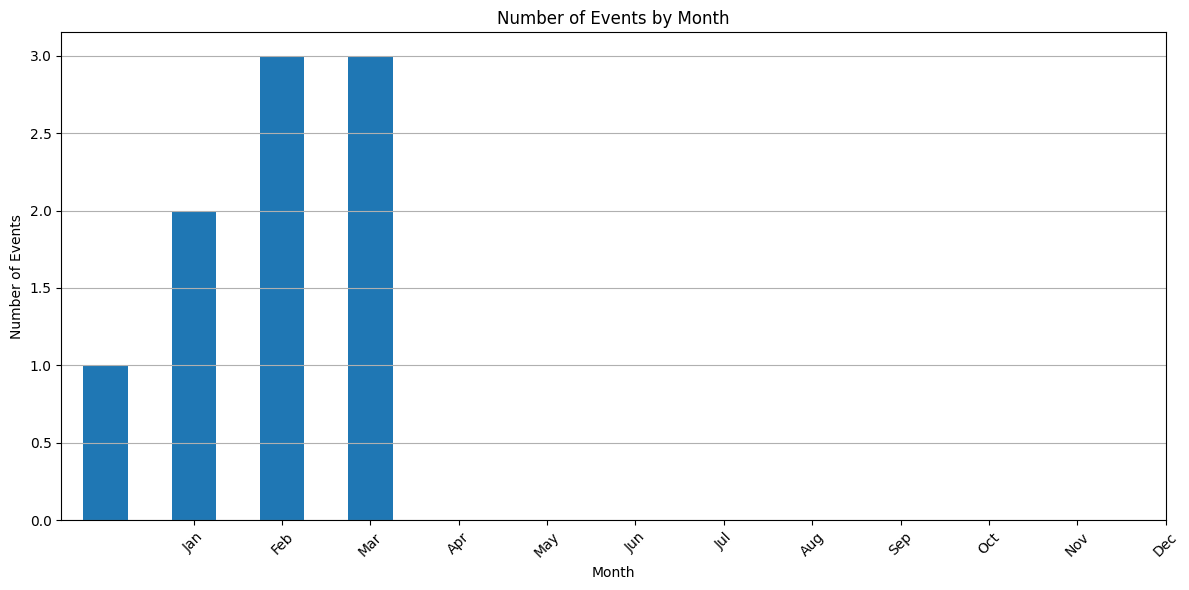

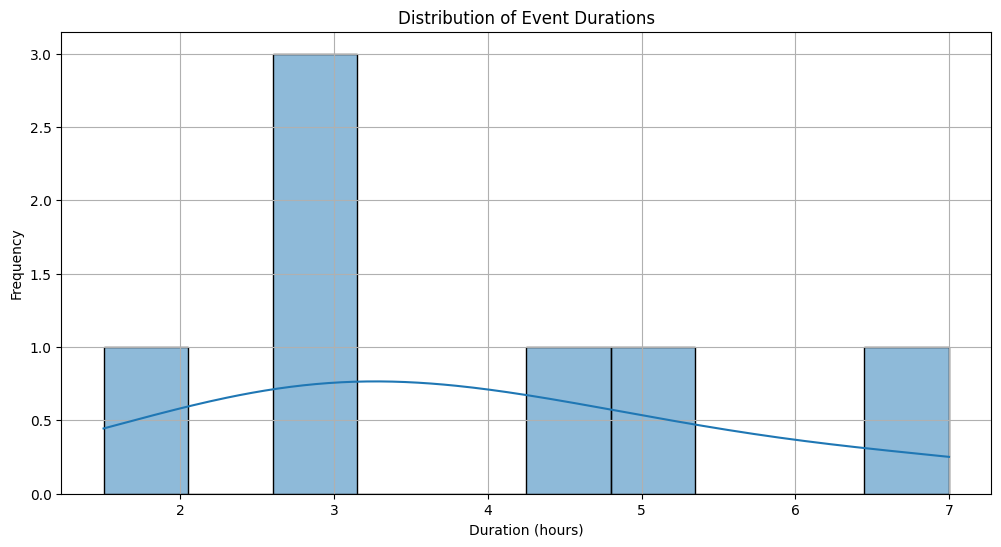

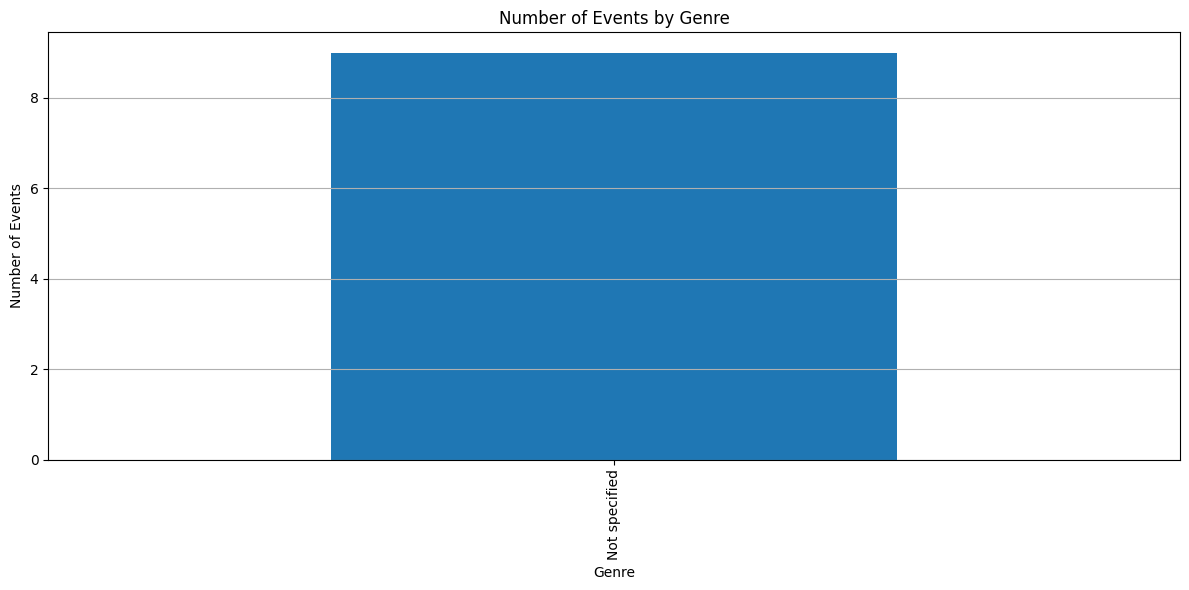

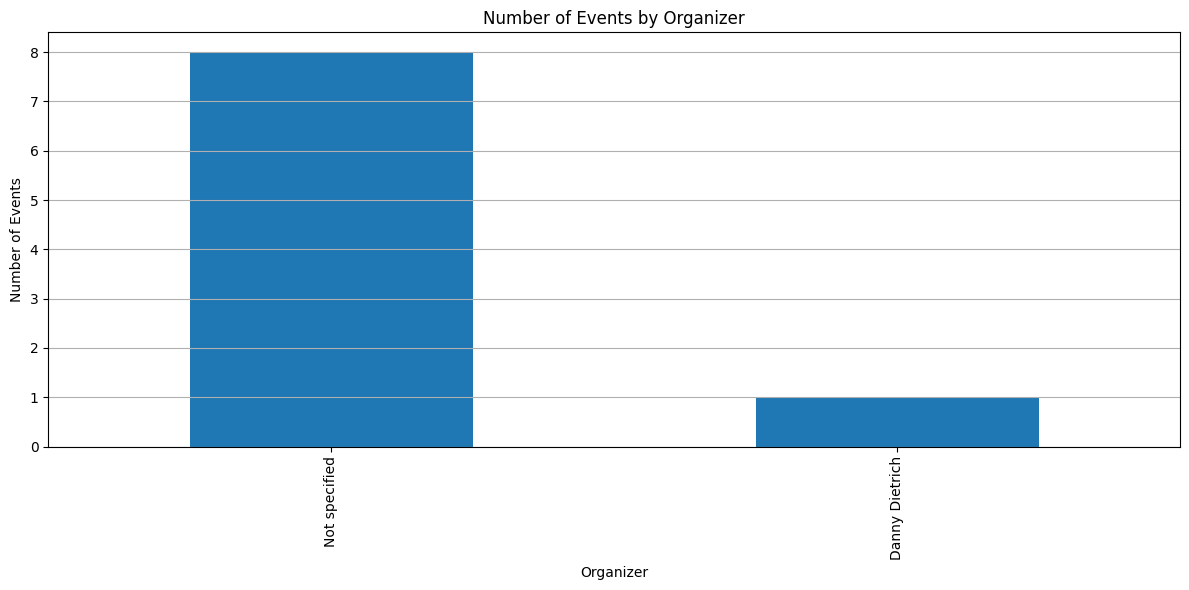

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data as provided
data = {
    'Event no.': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Title': ['DANCE NIGHT ALL WHITE', "Children's party world tour", 'Long Friday Night', 'Zumba Party 2024', 'Summer Festival',
              'tour 2024', 'Dance into May', 'Salsa Night', 'Discofox Dance Bar'],
    'Date': ['21 September', '14 September', '06 September', '29 June', '22 June', '08 June', '30 April', '05 April', '16 March'],
    'Start Time': ['19:30', '17:00', '22:00', '17:00', '18:00', '10:00', '20:00', '22:00', '19:00 (Workshop), 20:00 (Dance Bar)'],
    'End Time': ['24:00', '18:30', '01:00', '20:00', '22:30', '17:00', '01:00', '01:00', 'Not specified'],
    'Place/Location': ['FREE:An der Bar vorbeifliegen', 'Not specified', 'Not specified', 'Not specified', 'Market square in front of the town hall',
                        'Black Forest', 'Not specified', 'Not specified', 'Discofox-Pur'],
    'Description': ['Dance in white! Experience an unforgettable event...', 'We invite you to a very special trip around the world...',
                    'After your summer vacation, hit the dance floor...', 'Are you ready? Our Zumba party is exactly what you need...',
                    'Look forward to an unforgettable summer experience...', 'We cordially invite you to an exciting day tour...',
                    'The time has come! Spring is awakening and we are dancing...', 'The Salsa Night in April is getting an additional...',
                    'Discofox-Pur - Manfred’s TANZBAR is visiting P...'],
    'Event Link': ['/index.php/events/ticket-dance-night', 'Not specified', 'Not specified', 'Not specified', 'Not specified',
                   'Not specified', 'Not specified', 'Not specified', 'Not specified'],
    'Picture Link': ['/templates/yootheme/cache/9d/White-Night-Beitr...', '/templates/yootheme/cache/88/Kinderparty%20Wel...', '/templates/yootheme/cache/76/Long%20Friday%20N...',
                     '/templates/yootheme/cache/17/Zumba-Party-29Jun...', '/templates/yootheme/cache/59/Summer-Festival-I...',
                     '/templates/yootheme/cache/f1/Motorradtour-Beit...', '/templates/yootheme/cache/fd/TIDM-Ausverkauft-...',
                     '/templates/yootheme/cache/e5/DiscofoxTanzparty...', '/templates/yootheme/cache/e5/DiscofoxTanzparty...'],
    'Offerer/Organizer': ['Not specified', 'Not specified', 'Not specified', 'Not specified', 'Not specified', 'Danny Dietrich', 'Not specified', 'Not specified', 'Not specified'],
    'Genre (spec. by owner)': ['Not specified']*9,
    'Perimeter (spec. by owner)': ['Ticket Free', 'Not specified', 'Ticket :Abendkasse 5€', 'Not specified', 'Not specified',
                                   'Not specified', 'Not specified', 'Not specified', 'Not specified']
}

# Create DataFrame
df_events = pd.DataFrame(data)

# Convert 'Date' to datetime for time series plotting
df_events['Date'] = pd.to_datetime(df_events['Date'], format='%d %B', errors='coerce')

# Calculate event durations
def calculate_duration(row):
    if row['End Time'] == 'Not specified':
        return None
    try:
        start_time = pd.to_datetime(row['Start Time'], format='%H:%M').time()
        end_time = pd.to_datetime(row['End Time'], format='%H:%M').time()
        start = pd.Timestamp.combine(pd.Timestamp.now().normalize(), start_time)
        end = pd.Timestamp.combine(pd.Timestamp.now().normalize(), end_time)
        if end < start:
            end += pd.DateOffset(days=1)
        duration = (end - start).seconds / 3600  # duration in hours
        return duration
    except:
        return None

df_events['Duration (hours)'] = df_events.apply(calculate_duration, axis=1)

# Plot 1: Event Frequency Over Time
plt.figure(figsize=(12, 6))
df_events['Date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Events by Month')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot 2: Event Duration Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_events['Duration (hours)'].dropna(), kde=True, bins=10)
plt.title('Distribution of Event Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 3: Events by Genre
plt.figure(figsize=(12, 6))
df_events['Genre (spec. by owner)'].value_counts().plot(kind='bar')
plt.title('Number of Events by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Events')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot 4: Events by Organizer
plt.figure(figsize=(12, 6))
df_events['Offerer/Organizer'].value_counts().plot(kind='bar')
plt.title('Number of Events by Organizer')
plt.xlabel('Organizer')
plt.ylabel('Number of Events')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [64]:
print(df_events.columns)


Index(['Event no.', 'Title', 'Date', 'Start Time', 'End Time',
       'Place/Location', 'Description', 'Event Link', 'Picture Link',
       'Offerer/Organizer', 'Genre (spec. by owner)',
       'Perimeter (spec. by owner)'],
      dtype='object')
